In [165]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [167]:
# Loading data into a DataFrame from a CSV file
a = pd.read_csv ("/storage/emulated/0/music/hotel_bookings.csv")
a

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


The loaded CSV file contains many columns, some of which may be hidden due to the limited display width. To ensure all desired columns are visible, the `pd.set_option()` function can be used to adjust the number of columns displayed.


In [168]:
# Adjusting columns to be displayed 
pd.set_option('display.max.columns',32)
a

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [169]:
# Display a summary of the DataFrame
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [170]:
# Selecting the columns to analyse
a = a[['hotel', 'market_segment','customer_type','adults','children','babies','stays_in_weekend_nights','stays_in_week_nights','country', 'adr', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'is_canceled']]

In [171]:
a.head()

,hotel,market_segment,customer_type,adults,children,babies,stays_in_weekend_nights,stays_in_week_nights,country,adr,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,is_canceled
0,Resort Hotel,Direct,Transient,2,0.0,0,0,0,PRT,0.0,342,2015,July,1,0
1,Resort Hotel,Direct,Transient,2,0.0,0,0,0,PRT,0.0,737,2015,July,1,0
2,Resort Hotel,Direct,Transient,1,0.0,0,0,1,GBR,75.0,7,2015,July,1,0
3,Resort Hotel,Corporate,Transient,1,0.0,0,0,1,GBR,75.0,13,2015,July,1,0
4,Resort Hotel,Online TA,Transient,2,0.0,0,0,2,GBR,98.0,14,2015,July,1,0


In [172]:
# Replace NaN, inf, -inf with 0 for the children column
a['children'] = a['children'].replace([np.inf, -np.inf], np.nan)
a['children'] = a['children'].fillna(0).astype(int)


In [173]:
# summing up the guests columns to get its total population 
a['guest'] = a['adults'] + a['children'] + a['babies']

In [174]:
# Dropping the columns
a = a.drop(['adults','children','babies'], axis = 1)

In [175]:
# Getting a peek of selected columns
a.head()

,hotel,market_segment,customer_type,stays_in_weekend_nights,stays_in_week_nights,country,adr,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,is_canceled,guest
0,Resort Hotel,Direct,Transient,0,0,PRT,0.0,342,2015,July,1,0,2
1,Resort Hotel,Direct,Transient,0,0,PRT,0.0,737,2015,July,1,0,2
2,Resort Hotel,Direct,Transient,0,1,GBR,75.0,7,2015,July,1,0,1
3,Resort Hotel,Corporate,Transient,0,1,GBR,75.0,13,2015,July,1,0,1
4,Resort Hotel,Online TA,Transient,0,2,GBR,98.0,14,2015,July,1,0,2


In [176]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   market_segment             119390 non-null  object 
 2   customer_type              119390 non-null  object 
 3   stays_in_weekend_nights    119390 non-null  int64  
 4   stays_in_week_nights       119390 non-null  int64  
 5   country                    118902 non-null  object 
 6   adr                        119390 non-null  float64
 7   lead_time                  119390 non-null  int64  
 8   arrival_date_year          119390 non-null  int64  
 9   arrival_date_month         119390 non-null  object 
 10  arrival_date_day_of_month  119390 non-null  int64  
 11  is_canceled                119390 non-null  int64  
 12  guest                      119390 non-null  int64  
dtypes: float64(1), int64(7), obje

In [177]:
# Filling the country country with keyword "None"
a['country'] = a['country'].fillna ('None')

In [178]:
# converting the object columns to category columns
a['hotel'] = a['hotel'] .astype ('category')
a['country'] = a['country'] .astype ('category')

In [179]:
a.head()

,hotel,market_segment,customer_type,stays_in_weekend_nights,stays_in_week_nights,country,adr,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,is_canceled,guest
0,Resort Hotel,Direct,Transient,0,0,PRT,0.0,342,2015,July,1,0,2
1,Resort Hotel,Direct,Transient,0,0,PRT,0.0,737,2015,July,1,0,2
2,Resort Hotel,Direct,Transient,0,1,GBR,75.0,7,2015,July,1,0,1
3,Resort Hotel,Corporate,Transient,0,1,GBR,75.0,13,2015,July,1,0,1
4,Resort Hotel,Online TA,Transient,0,2,GBR,98.0,14,2015,July,1,0,2


In [180]:
# Adding a month number column relative to the arrival_date_month column
a['arrival_month_number'] = pd.to_datetime(a['arrival_date_month'], format='%B').dt.month

In [181]:

a.head()

,hotel,market_segment,customer_type,stays_in_weekend_nights,stays_in_week_nights,country,adr,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,is_canceled,guest,arrival_month_number
0,Resort Hotel,Direct,Transient,0,0,PRT,0.0,342,2015,July,1,0,2,7
1,Resort Hotel,Direct,Transient,0,0,PRT,0.0,737,2015,July,1,0,2,7
2,Resort Hotel,Direct,Transient,0,1,GBR,75.0,7,2015,July,1,0,1,7
3,Resort Hotel,Corporate,Transient,0,1,GBR,75.0,13,2015,July,1,0,1,7
4,Resort Hotel,Online TA,Transient,0,2,GBR,98.0,14,2015,July,1,0,2,7


In [182]:
# Adding up the arrivals columns to form a new column date
a['arrival_date'] = a['arrival_date_year'].astype(str) + '-' + a['arrival_month_number'].astype(str) + '-' + a['arrival_date_day_of_month'].astype(str)


In [183]:
# converting the new column from a string datatype to a datetime datatype
a['arrival_date'] = pd.to_datetime(a['arrival_date'], errors='coerce')


In [184]:
# confirming the changes on the datatype
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   hotel                      119390 non-null  category      
 1   market_segment             119390 non-null  object        
 2   customer_type              119390 non-null  object        
 3   stays_in_weekend_nights    119390 non-null  int64         
 4   stays_in_week_nights       119390 non-null  int64         
 5   country                    119390 non-null  category      
 6   adr                        119390 non-null  float64       
 7   lead_time                  119390 non-null  int64         
 8   arrival_date_year          119390 non-null  int64         
 9   arrival_date_month         119390 non-null  object        
 10  arrival_date_day_of_month  119390 non-null  int64         
 11  is_canceled                119390 non-null  int64   

In [185]:
# Identifying the reservation date column base on adr and arrival date
a['reservation_date'] = a['arrival_date'] - pd.to_timedelta(a['lead_time'], unit='d')

To get the real reservation date base on the lead time, i had to convert the arrival date year, month and day to get the arrival date. Then subtracting the lead time from the arrival date to get the reservation date.

In [186]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   hotel                      119390 non-null  category      
 1   market_segment             119390 non-null  object        
 2   customer_type              119390 non-null  object        
 3   stays_in_weekend_nights    119390 non-null  int64         
 4   stays_in_week_nights       119390 non-null  int64         
 5   country                    119390 non-null  category      
 6   adr                        119390 non-null  float64       
 7   lead_time                  119390 non-null  int64         
 8   arrival_date_year          119390 non-null  int64         
 9   arrival_date_month         119390 non-null  object        
 10  arrival_date_day_of_month  119390 non-null  int64         
 11  is_canceled                119390 non-null  int64   

In [187]:
# Reassigning the variable
df = a

In [188]:
df

,hotel,market_segment,customer_type,stays_in_weekend_nights,stays_in_week_nights,country,adr,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,is_canceled,guest,arrival_month_number,arrival_date,reservation_date
0,Resort Hotel,Direct,Transient,0,0,PRT,0.00,342,2015,July,1,0,2,7,2015-07-01,2014-07-24
1,Resort Hotel,Direct,Transient,0,0,PRT,0.00,737,2015,July,1,0,2,7,2015-07-01,2013-06-24
2,Resort Hotel,Direct,Transient,0,1,GBR,75.00,7,2015,July,1,0,1,7,2015-07-01,2015-06-24
3,Resort Hotel,Corporate,Transient,0,1,GBR,75.00,13,2015,July,1,0,1,7,2015-07-01,2015-06-18
4,Resort Hotel,Online TA,Transient,0,2,GBR,98.00,14,2015,July,1,0,2,7,2015-07-01,2015-06-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Offline TA/TO,Transient,2,5,BEL,96.14,23,2017,August,30,0,2,8,2017-08-30,2017-08-07
119386,City Hotel,Online TA,Transient,2,5,FRA,225.43,102,2017,August,31,0,3,8,2017-08-31,2017-05-21
119387,City Hotel,Online TA,Transient,2,5,DEU,157.71,34,2017,August,31,0,2,8,2017-08-31,2017-07-28
119388,City Hotel,Online TA,Transient,2,5,GBR,104.40,109,2017,August,31,0,2,8,2017-08-31,2017-05-14


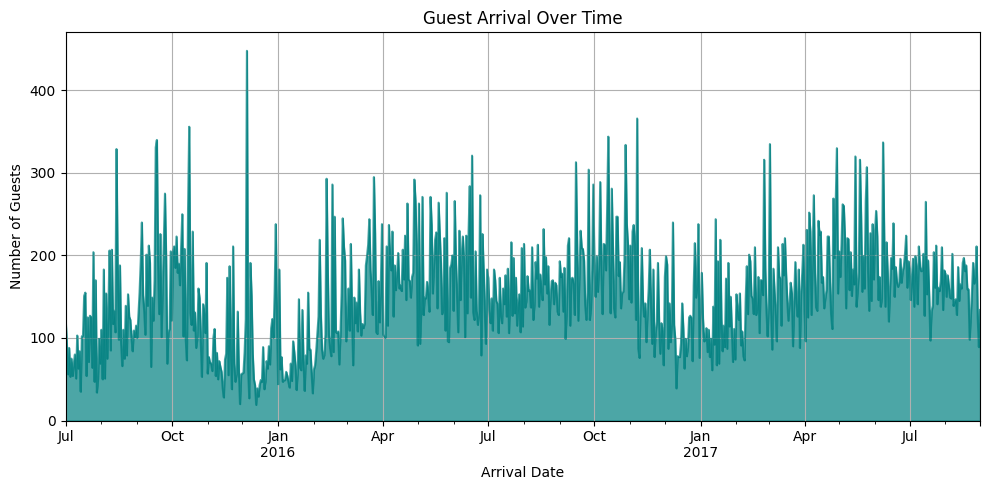

In [189]:
# guest_counts = df.groupby('arrival_date').size()
guest_counts = df['arrival_date'].value_counts().sort_index()
# Step 3: Plot as area chart
guest_counts.plot(kind='area', title='Guest Arrival Over Time', figsize=(10, 5), color='teal', alpha=0.7)

# Step 4: Customize axes
plt.xlabel('Arrival Date')
plt.ylabel('Number of Guests')
plt.grid(True)
plt.tight_layout()
plt.show()

The plot displays guest arrival trends over time, with **December 2015** showing the highest number of arrivals, reaching around **470 guests**. This peak is likely due to the festive season, which typically sees increased travel and hotel bookings.

In [190]:
df['country'].nunique()

178

While preparing a plot to visualize guest distribution by country, I discovered that there are **178 unique countries** in the dataset. Plotting all of them would result in a congested and unclear visualization. To improve clarity and focus, I filtered the data to display only the **top 10 countries** with the highest number of guests.

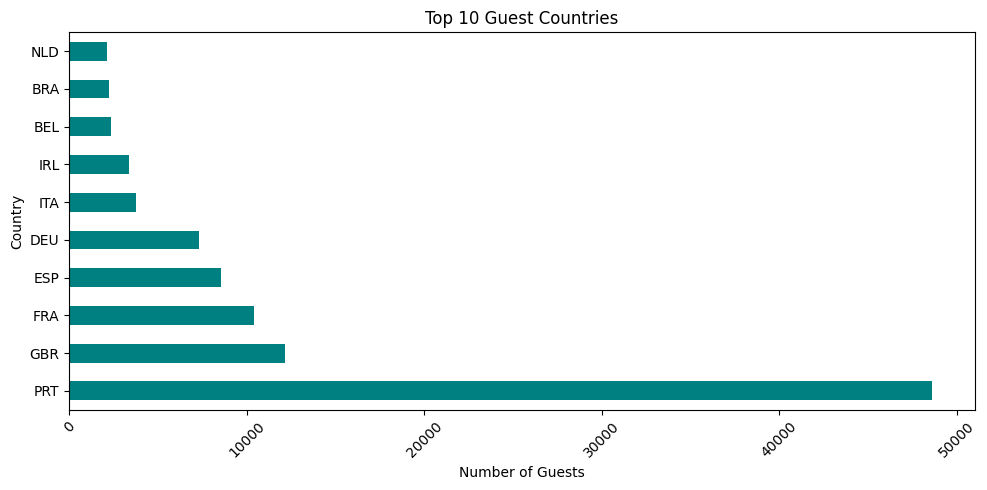

In [191]:
top_10_countries = df['country'].value_counts().head(10)

# Step 2: Plot
top_10_countries.plot(kind='barh', figsize=(10, 5), title='Top 10 Guest Countries', color='teal')

# Step 3: Label the axes
plt.xlabel('Number of Guests')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot indicates that the highest number of guests came from **PRT**. This significant difference compared to other countries may suggest that the hotel is located in **PRT**, making it more accessible or popular among local guests.

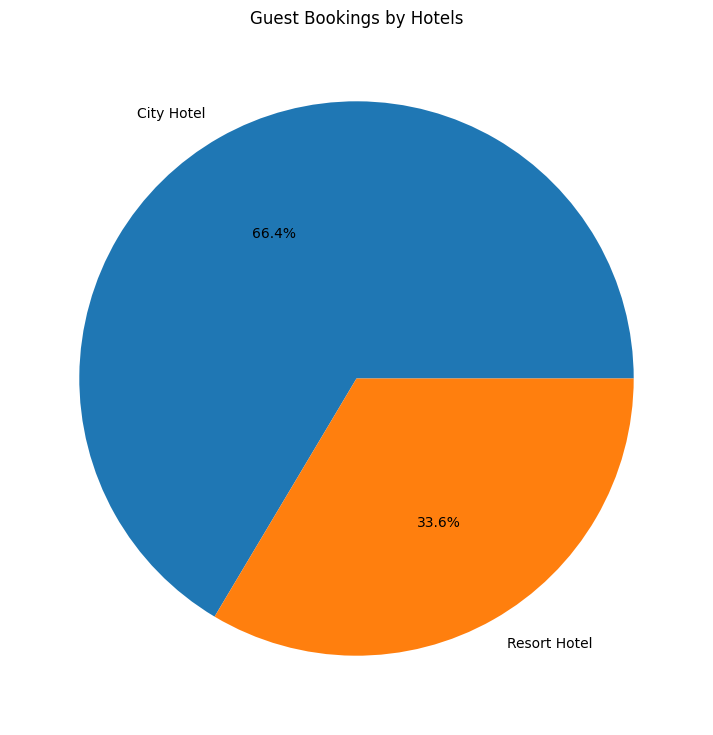

In [192]:
hotel_count = df['hotel'].value_counts()

# Step 2: Plot pie chart
hotel_count.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 9), title='Guest Bookings by Hotels')

# Step 3: Remove label for the pie chart
plt.ylabel('')  # Removes the label "market_segment"
plt.show()

The plot reveals that **66.4%** of guests booked **city hotels**, while **33.6%** chose **resort hotels**. This trend may suggest that the majority of guests preferred city hotels, possibly due to their convenience for business travel, conferences, or short-term stays.

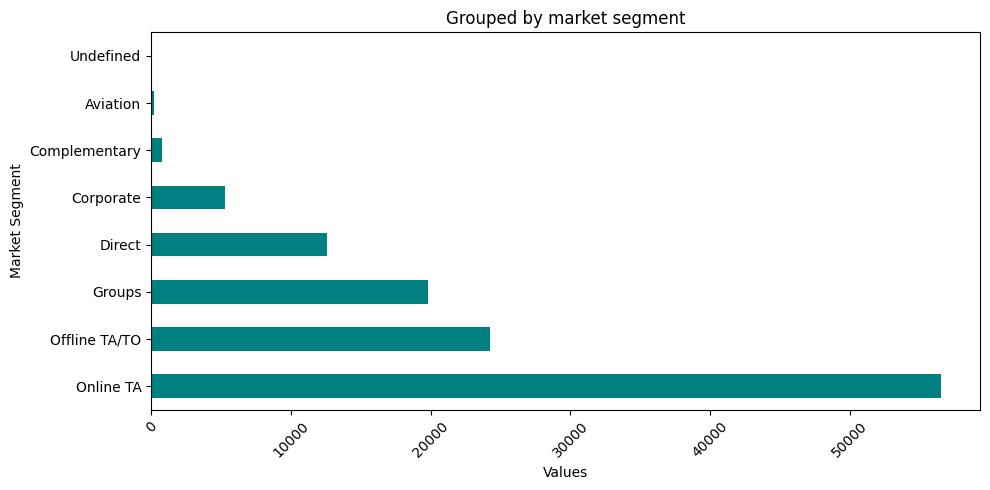

In [193]:
segment = df['market_segment'].value_counts()

# Plot
segment.plot(kind='barh', figsize=(10, 5), title='Grouped by market segment', color='teal')

# Label the axes
plt.xlabel('Values')
plt.ylabel('Market Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot shows that a larger number of guests made bookings through **Online Travel Agents (OTA)** compared to other market segments.

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   hotel                      119390 non-null  category      
 1   market_segment             119390 non-null  object        
 2   customer_type              119390 non-null  object        
 3   stays_in_weekend_nights    119390 non-null  int64         
 4   stays_in_week_nights       119390 non-null  int64         
 5   country                    119390 non-null  category      
 6   adr                        119390 non-null  float64       
 7   lead_time                  119390 non-null  int64         
 8   arrival_date_year          119390 non-null  int64         
 9   arrival_date_month         119390 non-null  object        
 10  arrival_date_day_of_month  119390 non-null  int64         
 11  is_canceled                119390 non-null  int64   

In [195]:
# create length of stay column
df['length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [196]:
# Group by length of stay
adr_by_stay = df.groupby('length_of_stay')['adr'].mean()

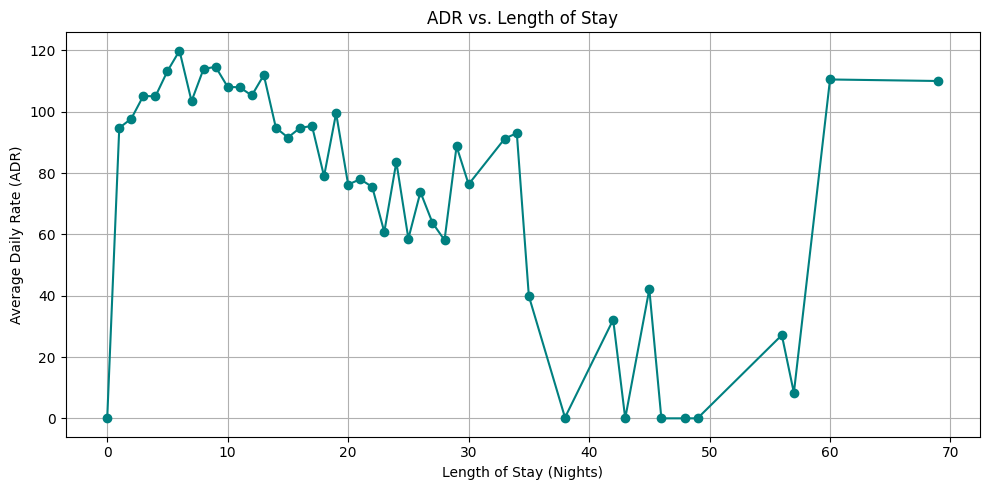

In [197]:
plt.figure(figsize=(10, 5))
adr_by_stay.plot(kind='line', marker='o', color='teal')
plt.title('ADR vs. Length of Stay')
plt.xlabel('Length of Stay (Nights)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.tight_layout()
plt.show()


This line plot shows the average daily rate (ADR) for different lengths of stay, ranging from short-term to longer stays.
It is observed that ADR tends to decrease as the length of stay increases, suggesting that longer stays offer better nightly rates — likely due to discounts or promotional pricing while Short stays such as 1-2 nights, appears to have higher ADRs possibly due to fixed operational costs or high demand for brief stays.

In [198]:
# creating column to calculate the best month to book a hotel room
adr_by_month = df.groupby('arrival_date_month')['adr'].mean().sort_index()

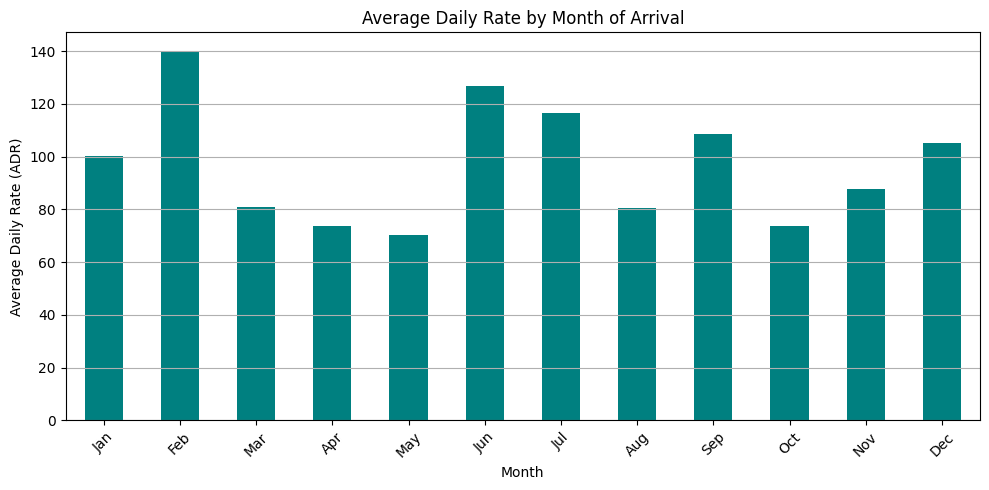

In [199]:
plt.figure(figsize=(10, 5))
adr_by_month.plot(kind='bar', color='teal')
plt.title('Average Daily Rate by Month of Arrival')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**May** recorded the lowest average daily rate (ADR), making it the most cost-effective month to book a hotel, followed closely by **April** and **October**.